# Regression using two datasets

1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 : mse 3000이하 달성
2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 : rmse 150 이하 달성
3. 시각화 요구사항이 정확히 이뤄졌는가? : 데이터개수 시각화 및 예측결과 모두 시각화



# 1. 손수 설계하는 선형회귀 : 당뇨병 수치를 맞춰보자
## 1-1. 데이터셋
### (1) 데이터 가져오기

In [1]:
# 라이브러리 호출
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 필요한 모듈 import
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
diabetes = load_diabetes()

dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
type(diabetes.data)

numpy.ndarray

data의 데이터타입이 ndarray이므로 dataframe 형태로 바꿔줘도 좋을 것 같다.

In [7]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### (2) 데이터 전처리

data에 들어있는 피쳐들을 다시 확인해보자

  - age : 나이
  - sex : 성별
  - bmi : 체질량지수(몸무게(kg)를 키의제곱(m)으로 나눈 값)
  - bp  : 평균혈압
  - s1  : 혈중 콜레스테롤
  - s2  : 저밀도 콜레스테롤
  - s3  : 고밀도 콜레스테롤
  - s4  : 콜레스테롤 총량
  - s5  : 혈청 트리글리세리드 수치의 기록
  - s6  : 혈당치
  
-  질병관리청의 정보를 참고해보니, 이 중 당뇨와 관련이 적은 피처는 성별이므로 지워줘도 될 것 같다고 판단했다.

In [9]:
# 피쳐 삭제를 위해 먼저 DataFrame으로 바꿔준다
data_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [10]:
data_df = data_df.drop(columns="sex")
data_df

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


### (3) 모델에 입력할 데이터 X 준비하기 

In [11]:
df_x = data_df
df_y = diabetes.target

In [12]:
# 모델에 입력할 데이터 x 준비하기
df_x = np.array(df_x)
df_x

array([[ 0.03807591,  0.06169621,  0.02187235, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.05147406, -0.02632783, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.04445121, -0.00567061, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844, -0.01590626,  0.01728186, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248,  0.03906215,  0.00121513, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.0730303 , -0.08141377, ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [13]:
# 모델에 예측할 데이터 y 준비하기
df_y = np.array(df_y)
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 1-2 검증데이터 분리

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x,
                                                    df_y,
                                                    test_size = 0.2,
                                                    random_state = 8
                                                    )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 9) (89, 9) (353,) (89,)


## 1-3. 모델 준비

In [15]:
# 가중치 W와 b 준비
W = np.random.rand(9)
b = np.random.rand()

In [16]:
W

array([0.02532541, 0.53635855, 0.9839267 , 0.93426564, 0.98019948,
       0.36367027, 0.00571322, 0.75944245, 0.58392288])

In [17]:
b

0.20530681448239874

In [18]:
# 모델 함수 구현
def model(df_x, W, b):
    predictions = 0
    for i in range(9):
        predictions += df_x[:, i] * W[i]
    predictions += b
    return predictions

## 1-4. 손실함수 loss 정의

In [19]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [20]:
def loss(df_x, W, b, df_y):
    predictions = model(df_x, W, b)
    L = MSE(predictions, df_y)
    return L

## 1-5. 기울기를 구하는 gradient 함수 구현

In [21]:
def gradient(df_x, W, b, df_y):
    # N은 데이터 포인트의 개수
    N = len(df_y)
    
    # y_pred 준비
    y_pred = model(df_x, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * df_x.T.dot(y_pred - df_y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - df_y).mean()
    return dW, db

In [22]:
dW, db = gradient(df_x, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37065576 -4.28769702 -3.22473057 -1.54053678 -1.26377683  2.88924547
 -3.14388732 -4.13494295 -2.79273185]
db: -303.85635469682705


## 1-6. 하이퍼 파라미터인 학습률 설정

In [23]:
LEARNING_RATE = 0.1

학습률을 0.1로 설정하였을 때가 가장 결과가 좋았다.

## 1-7. 모델 학습

In [24]:
losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5299.2870
Iteration 200 : Loss 4827.9900
Iteration 300 : Loss 4477.0095
Iteration 400 : Loss 4212.5893
Iteration 500 : Loss 4010.8112
Iteration 600 : Loss 3854.6846
Iteration 700 : Loss 3732.1028
Iteration 800 : Loss 3634.4056
Iteration 900 : Loss 3555.3698
Iteration 1000 : Loss 3490.4978
Iteration 1100 : Loss 3436.5181
Iteration 1200 : Loss 3391.0317
Iteration 1300 : Loss 3352.2636
Iteration 1400 : Loss 3318.8871
Iteration 1500 : Loss 3289.8986
Iteration 1600 : Loss 3264.5298
Iteration 1700 : Loss 3242.1842
Iteration 1800 : Loss 3222.3925
Iteration 1900 : Loss 3204.7803
Iteration 2000 : Loss 3189.0443
Iteration 2100 : Loss 3174.9362
Iteration 2200 : Loss 3162.2497
Iteration 2300 : Loss 3150.8116
Iteration 2400 : Loss 3140.4752
Iteration 2500 : Loss 3131.1148
Iteration 2600 : Loss 3122.6220
Iteration 2700 : Loss 3114.9030
Iteration 2800 : Loss 3107.8757
Iteration 2900 : Loss 3101.4681
Iteration 3000 : Loss 3095.6170
Iteration 3100 : Loss 3090.2663
Iteration 3200 : 

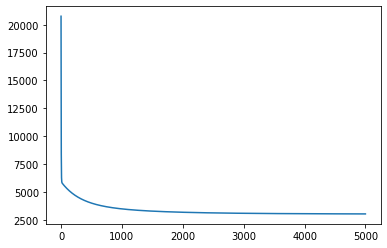

In [25]:
plt.plot(losses)
plt.show()

In [26]:
W

array([  -6.46551274,  507.50008525,  313.99468983,  -64.67610356,
       -121.05804849, -181.68899535,  101.01477436,  370.15411204,
        139.33727762])

In [27]:
b

152.10052990046682

## 1-8. test 데이터에 대한 성능 확인

In [28]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2941.430949138124

## 1-9. 정답 데이터와 예측한 데이터 시각화

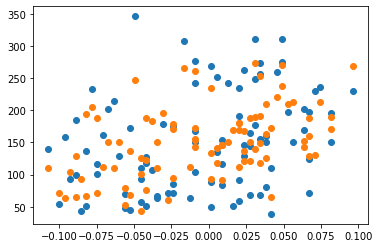

In [29]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 2. 날씨 좋은 월요일 오후 세시, 자전거 타는 사람은 몇 명?
- 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 텅해 자전거의 대여량을 예측해보기
- 사이킷런의 LinearRegression 모델 활용
___

## 2-1. 데이터셋
### (1) 데이터 가져오기

In [30]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- 데이터 정보
- 데이터에 결측치 없이 모두 채워져 있음을 알 수 있다.

이번엔 test 데이터도 살펴보자

In [32]:
test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


test 데이터에는 casual, registered 컬럼은 포함되어 있지 않은 것을 확인할 수 있다.

### (2) datetime 컬럼을 datetime 자료형으로 변환하고 년,월,일,시,분,초까지 6가지 컬럼 생성하기

In [33]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["datetime"]

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [34]:
test["datetime"] = pd.to_datetime(test["datetime"])
test["datetime"]

0      2011-01-20 00:00:00
1      2011-01-20 01:00:00
2      2011-01-20 02:00:00
3      2011-01-20 03:00:00
4      2011-01-20 04:00:00
               ...        
6488   2012-12-31 19:00:00
6489   2012-12-31 20:00:00
6490   2012-12-31 21:00:00
6491   2012-12-31 22:00:00
6492   2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: datetime64[ns]

In [35]:
datetime = train["datetime"].copy()
datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [36]:
datetime = datetime.to_frame()
datetime

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
10881,2012-12-19 19:00:00
10882,2012-12-19 20:00:00
10883,2012-12-19 21:00:00
10884,2012-12-19 22:00:00


object로 되어있으면 데이터의 분석이 어려우므로 원본데이터를 datetime 자료형으로 변환해주고, 변환된 데이터는 복사하여 변수에 할당하여 사용했다.

이제 데이터를 "년,월,일,시,분,초"의 각 컬럼으로 나눠준다.

In [37]:
datetime["datetime"].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

년으로 먼저 나누어 보았는데 잘 분리가 되는 것을 파악할 수 있다.
___
이제 데이터프레임을 만들어 6가지 컬럼을 추가해보겠다.

In [38]:
datetime_df = pd.DataFrame({'year' : datetime['datetime'].dt.year,
                            'month': datetime['datetime'].dt.month,
                            'day' : datetime['datetime'].dt.day,
                            'hour': datetime['datetime'].dt.hour,
                            'minute' : datetime['datetime'].dt.minute,
                            'second' : datetime['datetime'].dt.second
                           })
datetime_df

,year,month,day,hour,minute,second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0
...,...,...,...,...,...,...
10881,2012,12,19,19,0,0
10882,2012,12,19,20,0,0
10883,2012,12,19,21,0,0
10884,2012,12,19,22,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용하여 시각화
- subplot을 활용하여 한 번에 6개의 그래프 함께 시각화

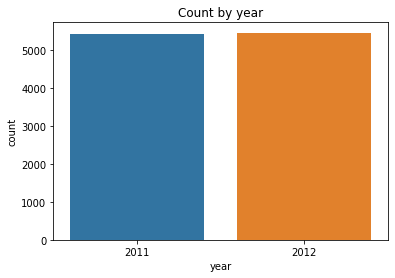

In [39]:
sns.countplot(x="year", data=datetime_df)
plt.title("Count by year")
plt.show()

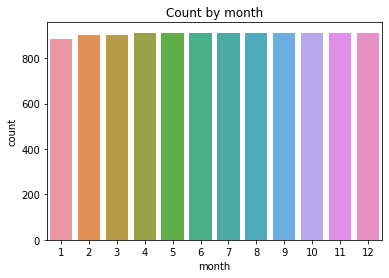

In [40]:
sns.countplot(x="month", data=datetime_df)
plt.title("Count by month")
plt.show()

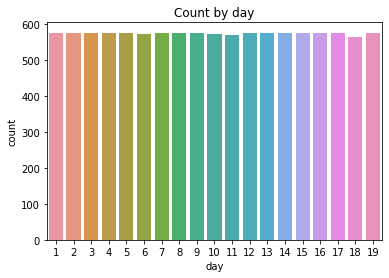

In [41]:
sns.countplot(x="day", data=datetime_df)
plt.title("Count by day")
plt.show()

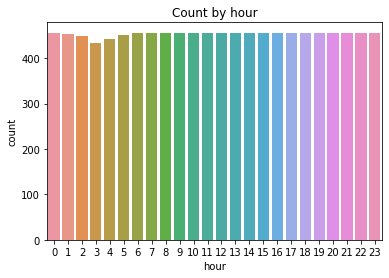

In [42]:
sns.countplot(x="hour", data=datetime_df)
plt.title("Count by hour")
plt.show()

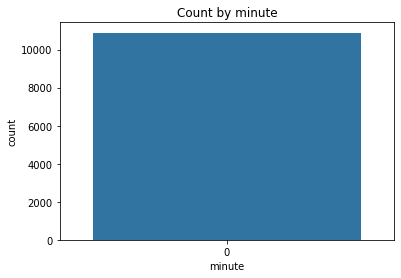

In [43]:
sns.countplot(x="minute", data=datetime_df)
plt.title("Count by minute")
plt.show()

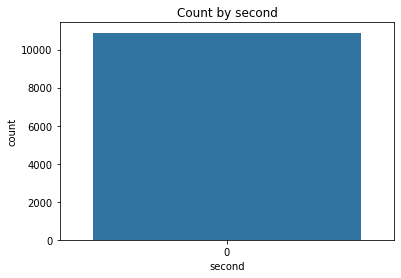

In [44]:
sns.countplot(x="second", data=datetime_df)
plt.title("Count by second")
plt.show()

보기 편하도록 그래프들을 한번에 시각화한다.

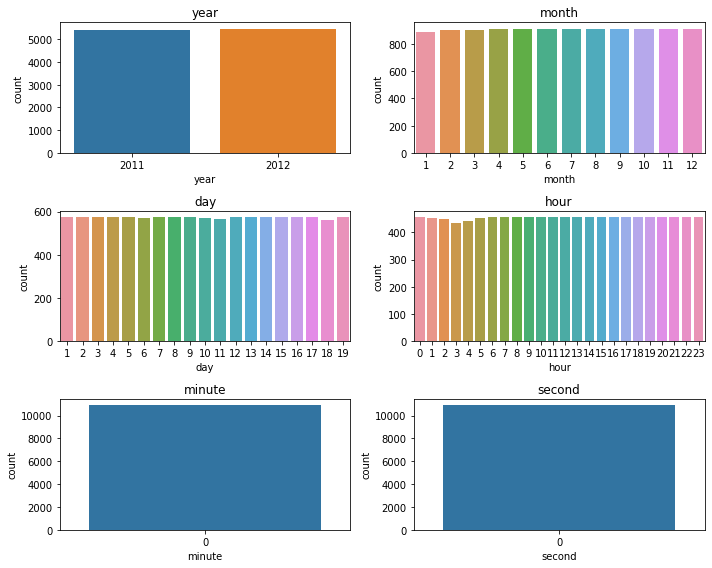

In [45]:
plt.figure(figsize = (10,8))

plt.subplot(3,2,1)
sns.countplot(x="year", data=datetime_df)
plt.title("year")

plt.subplot(3,2,2)
sns.countplot(x="month", data=datetime_df)
plt.title("month")

plt.subplot(3,2,3)
sns.countplot(x="day", data=datetime_df)
plt.title("day")

plt.subplot(3,2,4)
sns.countplot(x="hour", data=datetime_df)
plt.title("hour")

plt.subplot(3,2,5)
sns.countplot(x="minute", data=datetime_df)
plt.title("minute")

plt.subplot(3,2,6)
sns.countplot(x="second", data=datetime_df)
plt.title("second")

plt.tight_layout()
plt.show()

- minute와 second는 모두 0으로 되어있어서 데이터에 큰 의미는 없는 것으로 판단된다.
- 년,월,일,시 데이터 같은 경우에 데이터 간의 격차가 눈에 띄게 보이는 것이 아니라 아쉬움이 생긴다. 데이터에 변화를 주어 다른 시각화 그래프를 사용해도 될 것 같다.
- 시간 데이터를 보면 3시에 대여 수가 확연하게 떨어진다는 것을 확인할 수 있다.
- 이 데이터에서 의미있는 데이터는 년,월,일,시 라는 것을 알 수 있다. 분,초는 없애도 될 것 같다.
___
- 나뉜 컬럼이 데이터 분석에 유용한 것을 확인했으니 전체 데이터프레임에 각 프레임을 추가해주기로 한다.
- test데이터도 똑같이 만들어준다.

In [46]:
train["year"] = train['datetime'].dt.year   ## 연 dtY 컬럼을 만들어서 추가
train["month"] = train['datetime'].dt.month  ## 월 dtM 컬럼을 만들어서 추가
train["day"] = train['datetime'].dt.day    ## 일 dtD 컬럼을 만들어서 추가
train["hour"] = train['datetime'].dt.hour   ## 시 dth 컬럼을 만들어서 추가
train["minute"] = train['datetime'].dt.minute ## 분 dtm 컬럼을 만들어서 추가
train["second"] = train['datetime'].dt.second ## 초 dts 컬럼을 만들어서 추가

test["year"] = test['datetime'].dt.year   ## 연 dtY 컬럼을 만들어서 추가
test["month"] = test['datetime'].dt.month  ## 월 dtM 컬럼을 만들어서 추가
test["day"] = test['datetime'].dt.day    ## 일 dtD 컬럼을 만들어서 추가
test["hour"] = test['datetime'].dt.hour   ## 시 dth 컬럼을 만들어서 추가
test["minute"] = test['datetime'].dt.minute ## 분 dtm 컬럼을 만들어서 추가
test["second"] = test['datetime'].dt.second ## 초 dts 컬럼을 만들어서 추가

In [47]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [48]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


### (4) 데이터 전처리

In [49]:
# datetime 컬럼 삭제 
train = train.drop(columns="datetime")

test = test.drop(columns="datetime")

In [50]:
# 분,초 컬럼 삭제
train = train.drop(columns="minute")
train = train.drop(columns="second")

test = test.drop(columns="minute")
test = test.drop(columns="second")

In [51]:
# casual, registered 컬럼 삭제
train = train.drop(columns="casual")
train = train.drop(columns="registered")

In [52]:
print(train.shape)
train.head()

(10886, 13)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [53]:
print(test.shape)
test.head()

(6493, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


train과 test의 컬럼이 count를 제외하고는 동일한 컬럼을 갖게 되었다.

count는 이번 데이터 분석에서 target에 해당하는 값이므로 검증데이터 분리 때 분리해주기로 한다.

## 2-2. 검증데이터 분리

### X,y 컬럼 선택 및 train/test 데이터 분리

In [54]:
# y에 타겟 할당해주기
y = train["count"]
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [55]:
# 타겟으로 count를 설정했기 때문에 train 데이터에서는 제외시킨다.
train = train.drop(columns = "count")
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 18)

## 2-3. LinearRegrssion 모델 학습

In [57]:
# 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 2-4. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [58]:
#
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred, squared=False)

In [59]:
#
rmse_val = rmse(y_test, y_pred)

print("RSME : ", rmse_val)

RSME :  142.17085115289714


## 2-5. x축은 temp또는 humidity로, y축은 count로 예측 결과 시각화

In [60]:
## 결과를 간단하게 확인해보고자 데이터프레임을 하나 새로 만들어 보았다.
train_temp = X_test.copy()      
train_temp["pred"] = y_pred     
train_temp["tagt"] = y_test     
train_temp   

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,pred,tagt
5833,1,0,1,1,13.94,14.395,36,35.0008,2012,1,18,6,164.480361,88
4889,4,0,1,3,18.86,22.725,88,26.0027,2011,11,16,19,182.210074,111
6369,1,0,1,2,17.22,21.210,50,19.9995,2012,3,2,15,240.419926,78
3832,3,0,0,1,30.34,34.090,55,12.9980,2011,9,10,16,285.242661,431
6163,1,0,1,1,4.92,6.060,50,15.0013,2012,2,13,1,37.616704,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9494,3,0,1,2,22.96,26.515,83,15.0013,2012,9,18,23,317.479236,78
800,1,0,1,1,13.94,15.910,53,15.0013,2011,2,16,19,150.110030,161
1288,1,0,1,1,26.24,31.060,41,19.0012,2011,3,18,13,229.743213,175
1900,2,0,1,1,15.58,19.695,62,7.0015,2011,5,6,2,32.081526,16


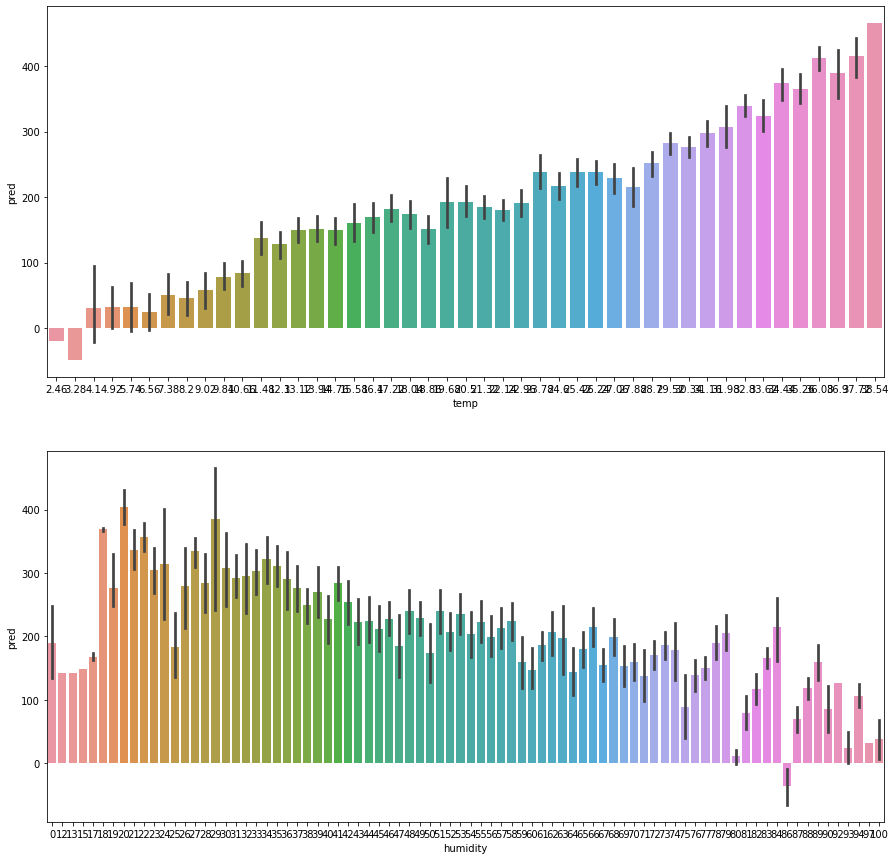

In [61]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(15, 15)

## 온도에 따른 대여 건수

sns.barplot(data=train_temp, x="temp", y="pred", ax=ax1)
## 습도에 따른 대여 건수
sns.barplot(data=train_temp, x="humidity", y="pred", ax=ax2)

plt.show()

온도가 좋을수록, 습도가 낮을수록 자전거 대여율이 높다는 것을 알 수 있다.

# 3. 알게 된 내용

1. return mean_squared_error(y_test, y_pred, squared=False)로 RMSE를 나타낼 수 있는 것을 알게 되었다. MSE에 루트를 씌워주는 작업만 알고 있었는데 더 간단한 식을 찾을 수 있게 되어서 좋았다.

# 4. 어려웠던 점 & 의문점

1. 프로젝트 1을 진행할 때 diabetes.data의 타입은 이미 numpy.array의 형태였는데 노드에서 왜 값들을 변환하라고 지시했는지 의문이 들었다.(해결함)
    그러나 몇번 진행을 하면서 꼭 필요한 작업이라는 것을 알게 되었다.
2. lms에는 test 데이터를 불러오라는 이야기가 없어 조금 해멨다. 아직 데이터를 다루는데에 미숙하다는 게 느껴져서 조금 시무룩했다😂
3. 전에 했던 프로젝트와 달리 train과 test를 각각 처리해줘야 하는 게 조금 낯설었다.

# 5. 회고
- 벌써 4번째 프로젝트이다. 할 때마다 시작할 때 이걸 할 수 있을까? 생각이 들고  벅찬데 막상해보면 또 되긴 하는 것 같다. 그런데 항상 계획한만큼 완벽?하게 수행할 수 없는게 아쉽고 모르는 게 계속 나와서 데이터 분석이 재밌는 한 편, 걱정도 드는 것이 사실이다. 매번 기한 내에 여유롭게 끝내고 싶은 데 다른 노드학습과 병행하며 결국 프로젝트 기한까지 끌고 가는 게 아쉬운 것 같다. 프로젝트를 진행하며 지식도 느는 것 같고 수행력도 높아진다고 생각하는데 다음 프로젝트를 하다보면 또 전과 달라진 게 없는 기분이 든다.
- 이번 주 까지 끝내면 기초통계까지 마무리하게 되는데 그동안 한 공부를 잘 정리해 보며 다음 프로젝트는 좀 더 수월하기를 기대해본다.
- 코드는 거짓말하지 않는다는 말을 체감하게 된 것 같다. 오류가 났을 때는 머리를 벅벅 긁으면서 고심하게 되는데 천천히 올라가보면 결국 코드에 오류가 있음을 알게 된다.
  이번에는 코드의 오류들을 스스로 많이 해결할 수 있어 좋았다.
- 당뇨병 데이터에서 mse 수치를 많이 떨어뜨리지 못한 것이 아쉽다.

# 6. Reference

- 회귀 (https://yhyun225.tistory.com/11)
- 당뇨병 정보 (https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5305)
- scatter (https://workingwithpython.com/matplotlib_scatterplot/), (https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=samsjang&logNo=220750096107), (https://blog.naver.com/PostView.nhn?blogId=cjh226&logNo=221266500054)
- to_datetime (https://steadiness-193.tistory.com/171)
- countplot(https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)
- subplot (https://codetorial.net/matplotlib/subplot.html), (https://zephyrus1111.tistory.com/120)
